In [2]:
import h5py
import numpy as np
import pandas as pd

def load_mock(path):
    with h5py.File(path, "r") as f:
        # lens subset
        if "lens" in f and "table" in f["lens"]:
            lens_df = pd.DataFrame.from_records(f["lens"]["table"][...])
        else:
            lens_df = pd.DataFrame()

        # observed data
        if "observed" in f and "table" in f["observed"]:
            obs_df = pd.DataFrame.from_records(f["observed"]["table"][...])
        else:
            obs_df = pd.DataFrame()

        # underlying samples
        samples = {}
        if "samples" in f:
            for key in f["samples"].keys():
                samples[key] = np.asarray(f["samples"][key][...])

    return lens_df, obs_df, samples
import pandas as pd

def extract_lens_params(lens_df):
    keys = [
        "lens_id",
        "logM_star_sps",
        "logM_star",
        "logM_halo",
        "logRe",
        "gamma_in",
        "c_halo",
        "ycaustic_kpc",
        "ycaustic_arcsec",
    ]

    # 只选择存在的字段（更鲁棒）
    keys = [k for k in keys if k in lens_df.columns]

    lens_params_df = lens_df[keys].copy()
    return lens_params_df


In [3]:
lens_df, obs_df, samples = load_mock("data/mock_4/mock_20251120T033333Z.h5")
lens_df1, obs_df1, samples1 = load_mock("data/mock_4old/mock_20251119T041800Z.h5")

In [7]:
for key, arr in samples.items():
    print(f"=== {key} ===")
    print("mean =", np.mean(arr))
    print("std  =", np.std(arr))
    print("min  =", np.min(arr))
    print("max  =", np.max(arr))
    print(len(arr))
    print()

for key, arr in samples1.items():
    print(f"=== {key} ===")
    print("mean =", np.mean(arr))
    print("std  =", np.std(arr))
    print("min  =", np.min(arr))
    print("max  =", np.max(arr))
    print(len(arr))
    print()


=== beta_unit ===
mean = nan
std  = nan
min  = nan
max  = nan
200000

=== c_halo ===
mean = 5.0
std  = 0.0
min  = 5.0
max  = 5.0
200000

=== gamma_in ===
mean = 1.000555912452707
std  = 0.1995311393462158
min  = 0.12999461805328627
max  = 1.967456509645591
200000

=== logM_halo ===
mean = 12.879429294736752
std  = 0.48220893376942814
min  = 10.694210882175415
max  = 15.03647569073207
200000

=== logM_star_sps ===
mean = 11.384959728818254
std  = 0.15151522382360702
min  = 10.83050890089928
max  = 12.208417681672293
200000

=== logRe ===
mean = 0.7594710946009864
std  = 0.1854012033483701
min  = -0.043829208093913274
max  = 1.6444508078796463
200000

=== m_s ===
mean = nan
std  = nan
min  = nan
max  = nan
200000

=== beta_unit ===
mean = nan
std  = nan
min  = nan
max  = nan
200000

=== c_halo ===
mean = 5.0
std  = 0.0
min  = 5.0
max  = 5.0
200000

=== gamma_in ===
mean = 1.000020895889253
std  = 0.20012483526834662
min  = 0.12420261638518726
max  = 2.118944370227661
200000

=== logM_hal

In [4]:
lens_params_df = extract_lens_params(lens_df)
lens_params_df.describe()

,lens_id,logM_star_sps,logM_star,logM_halo,logRe,gamma_in,c_halo,ycaustic_kpc,ycaustic_arcsec
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.0,2457.000000,2457.000000
mean,298781.569394,11.459406,11.459406,13.167955,0.807341,1.076713,5.0,5.384751,1.208886
std,175183.171499,0.172868,0.172868,0.584297,0.203691,0.218265,0.0,3.663310,0.822420
min,83.000000,11.001910,11.001910,11.435071,0.207721,0.290912,5.0,1.375744,0.308857
25%,145644.000000,11.340845,11.340845,12.761637,0.668361,0.931735,5.0,3.704528,0.831673
50%,301233.000000,11.443937,11.443937,13.137814,0.792668,1.070971,5.0,4.628510,1.039109
75%,451077.000000,11.565449,11.565449,13.535898,0.938593,1.227970,5.0,5.806115,1.303483
max,599714.000000,12.059913,12.059913,15.154116,1.646312,1.722879,5.0,51.435733,11.547415


In [5]:
lens_params_df = extract_lens_params(lens_df1)
lens_params_df.describe()

,lens_id,logM_star_sps,logM_star,logM_halo,logRe,gamma_in,c_halo,ycaustic_kpc,ycaustic_arcsec
count,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.0,2440.000000,2440.000000
mean,298749.992623,11.458969,11.458969,13.164999,0.806954,1.077254,5.0,5.371413,1.205892
std,175429.128969,0.172926,0.172926,0.582461,0.202591,0.217881,0.0,3.653557,0.820230
min,83.000000,11.001910,11.001910,11.435071,0.207721,0.290912,5.0,1.375744,0.308857
25%,145066.000000,11.340723,11.340723,12.762355,0.668425,0.930060,5.0,3.701008,0.830883
50%,300158.500000,11.442543,11.442543,13.124512,0.791741,1.073038,5.0,4.626736,1.038711
75%,451266.000000,11.565120,11.565120,13.528665,0.937019,1.228420,5.0,5.777732,1.297111
max,599714.000000,12.059913,12.059913,15.154116,1.646312,1.722879,5.0,51.435733,11.547415


In [18]:
import sys
sys.path.append("../../")
import argparse

import numpy as np

from sl_inference_3Dinfer_hdf5_server.tests_eta.generate_mock import generate_or_load_mock
from sl_inference_3Dinfer_hdf5_server.tests_eta.tabulate_mock import tabulate_for_mock
from sl_inference_3Dinfer_hdf5_server.tests_eta.likelihood_slices import (
    load_grids_from_hdf5,
    compute_1d_loglike,
    compute_2d_loglike,
)
from sl_inference_3Dinfer_hdf5_server.tests_eta.plot_slices import plot_1d_loglike, plot_2d_loglike
from sl_inference_3Dinfer_hdf5_server.tests_eta.mock_generator.mass_sampler import MODEL_PARAMS


TypeError: unsupported operand type(s) for |: 'type' and 'NoneType'

In [ ]:
grids = load_grids_from_hdf5(grids_path)

# Ground truth for injection
alpha_true = 0.0
model_p = MODEL_PARAMS["deVauc"]
mu_h_true = float(model_p["mu_h0"])
mu_gamma_true = 1.0

# 1D grids around true values
alpha_grid = np.linspace(-0.1, 0.1, 80)
mu_h_grid = np.linspace(mu_h_true - 0.3, mu_h_true + 0.3, 80)
mu_gamma_grid = np.linspace(0.6, 1.4, 80)

fixed = {
    "alpha_sps": alpha_true,
    "mu_h": mu_h_true,
    "mu_gamma": mu_gamma_true,
}

# 4. Compute and plot 1D slices
logL_alpha = compute_1d_loglike(
    grids,
    "alpha_sps",
    alpha_grid,
    fixed_params=fixed,
    use_prior=True,
    use_A_eta=True,
)
plot_1d_loglike(
    index,
    "alpha_sps",
    alpha_grid,
    logL_alpha,
    true_value=alpha_true,
)


In [ ]:
import sys
sys.path.append("../../")
import argparse

import numpy as np

from sl_inference_3Dinfer_hdf5_server.tests_eta.generate_mock import generate_or_load_mock
from sl_inference_3Dinfer_hdf5_server.tests_eta.tabulate_mock import tabulate_for_mock
from sl_inference_3Dinfer_hdf5_server.tests_eta.likelihood_slices import (
    load_grids_from_hdf5,
    compute_1d_loglike,
    compute_2d_loglike,
)
from sl_inference_3Dinfer_hdf5_server.tests_eta.plot_slices import plot_1d_loglike, plot_2d_loglike
from sl_inference_3Dinfer_hdf5_server.mock_generator.mass_sampler import MODEL_PARAMS


import numpy as np
from sl_inference_3Dinfer_hdf5_server.tests_eta.likelihood_slices import (
    load_grids_from_hdf5,
    compute_1d_loglike,
)
import matplotlib.pyplot as plt
from sl_inference_3Dinfer_hdf5_server.mock_generator.mass_sampler import MODEL_PARAMS

# -----------------------------
# 1. 读取 grids 文件
# -----------------------------
grids_path = "./data/mock_3/grids_20251119T210801Z.h5"  # <-- 替换成你的 grids 文件路径
grids = load_grids_from_hdf5(grids_path)

# -----------------------------
# 2. 设置 alpha_sps 网格
# -----------------------------
alpha_true = 0.0   # ground truth
alpha_grid = np.linspace(-0.025, 0.025, 50)  # 高分辨率网格

# -----------------------------
# 3. 计算一维后验（log-likelihood）
# -----------------------------
# Ground truth for injection
alpha_true = 0.0
model_p = MODEL_PARAMS["deVauc"]
mu_h_true = float(model_p["mu_h0"])
mu_gamma_true = 1.0

# 1D grids around true values
alpha_grid = np.linspace(-0.1, 0.1, 80)
mu_h_grid = np.linspace(mu_h_true - 0.3, mu_h_true + 0.3, 80)
mu_gamma_grid = np.linspace(0.6, 1.4, 80)

mu_gamma_grid = np.linspace(0.6, 1.4, 300)

fixed = {
    "alpha_sps": alpha_true,
}

logL_mu_h = compute_1d_loglike(
    grids,
    "mu_h",
    mu_h_grid,
    fixed_params=fixed,
    use_prior=True,
    use_A_eta=True,
    use_A_eta_table=False,
)
# plot_1d_loglike(
#     index,
#     "alpha_sps",
#     alpha_grid,
#     logL_alpha,
#     true_value=alpha_true,
# )

# -----------------------------
# 4. 后验归一化
# -----------------------------
# posterior ∝ exp(logL)
# posterior = np.exp(logL_alpha - np.max(logL_alpha))  # 防止溢出
# posterior /= np.trapz(posterior, alpha_grid)         # 归一化成 PDF

# -----------------------------
# 5. 绘图
# -----------------------------

posterior = np.exp(logL_mu_h - np.max(logL_mu_h))  # 防止溢出
posterior /= np.trapz(posterior, mu_h_grid)         # 归一化成 PDF

0it [00:00, ?it/s]
solving lenses: 100%|█████████▉| 19927/20000 [00:16<00:00, 1197.48it/s]
1it [00:19, 19.35s/it]                                                 
solving lenses:  99%|█████████▉| 19896/20000 [00:16<00:00, 1284.80it/s]
2it [00:38, 19.00s/it]                                                 
solving lenses: 100%|█████████▉| 19993/20000 [00:16<00:00, 1266.62it/s]
3it [00:56, 18.90s/it]                                                 
solving lenses: 100%|█████████▉| 19984/20000 [00:16<00:00, 1255.20it/s]
4it [01:15, 18.87s/it]                                                 
solving lenses: 100%|█████████▉| 19903/20000 [00:16<00:00, 1265.92it/s]
5it [01:34, 18.94s/it]                                                 
solving lenses: 100%|█████████▉| 19962/20000 [00:16<00:00, 1199.58it/s]
6it [01:54, 19.07s/it]                                                 
solving lenses: 100%|█████████▉| 19953/20000 [00:16<00:00, 1209.84it/s]
7it [02:13, 19.11s/it]                       

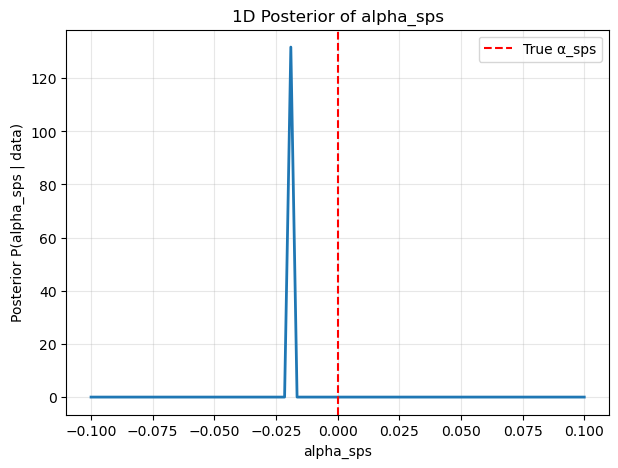

In [3]:
%matplotlib inline
plt.figure(figsize=(7,5))
plt.plot(alpha_grid, posterior, lw=2)
plt.axvline(alpha_true, color="red", linestyle="--", label="True α_sps")
plt.xlabel("alpha_sps")
plt.ylabel("Posterior P(alpha_sps | data)")
plt.title("1D Posterior of alpha_sps")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [6]:
logL_mu_h

array([-796.79166721, -604.05310203, -628.66647696, -618.75923321,
       -638.87783531, -672.32620441, -633.73580684, -650.3364747 ,
       -744.58408777, -697.58432526, -584.11966462, -452.17918212,
       -542.61531323, -471.3511072 , -467.05218019, -599.44337349,
       -437.67827282, -307.30750794, -405.26102106, -512.06693752,
       -298.92544982, -404.80110275, -433.40799938, -208.54006608,
       -224.3552601 , -462.84797595, -275.63290828, -330.77426961,
       -236.29207819, -281.4635004 , -392.87244167, -218.82788802,
          0.        , -290.06641588, -138.93987069, -206.77108672,
       -261.18264636, -172.76025101, -148.78915189, -274.69139535,
       -187.79023279,  -59.2338328 , -241.74702925, -189.64684163,
       -135.42015859, -185.17011928, -195.07123194,  -65.42269697,
       -145.95575119, -120.28326044, -235.47111958, -284.95331905,
       -219.1902147 , -284.1988945 , -382.25725136, -157.08447503,
       -127.45088601, -211.92613768,  -75.83525686, -267.82574

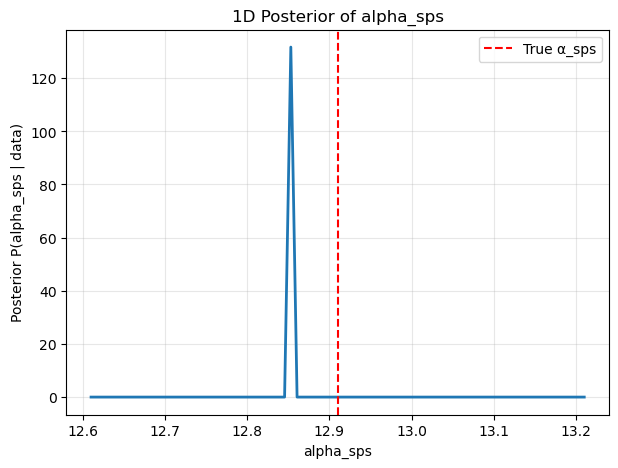

In [7]:
%matplotlib inline
plt.figure(figsize=(7,5))
plt.plot(mu_h_grid, posterior, lw=2)
plt.axvline(12.91, color="red", linestyle="--", label="True α_sps")
plt.xlabel("alpha_sps")
plt.ylabel("Posterior P(alpha_sps | data)")
plt.title("1D Posterior of alpha_sps")
plt.legend()
plt.grid(alpha=0.3)
plt.show()